# Slope primary dependence

Parameterize the primary dependence of mean square slope on wind speed in Hurricane Idalia (2023).

In [245]:
import cartopy
import colorcet
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

from configure import read_stored_variable
from src import stats, plotting

# Setup

Run the previous notebook and read stored variables.

In [246]:
%%capture
# %run 'nb4-spectra.ipynb'
%run -i configure.py

In [247]:
microswift_df = read_stored_variable('microswift_df')
spotter_df = read_stored_variable('spotter_df')
ian_spotter_coamps_df = read_stored_variable('ian_spotter_coamps_df')
fiona_spotter_coamps_df = read_stored_variable('fiona_spotter_coamps_df')
coamps_ds = read_stored_variable('coamps_ds')
coamps_xy_ds = read_stored_variable('coamps_xy_ds')
sfmr_ds = read_stored_variable('sfmr_ds')

plotting.configure_figures()

## Mean square slope versus wind speed

Plot Hurricane Idalia (2023) Spotter and microSWIFT mean square slope versus COAMPS-TC wind speed.

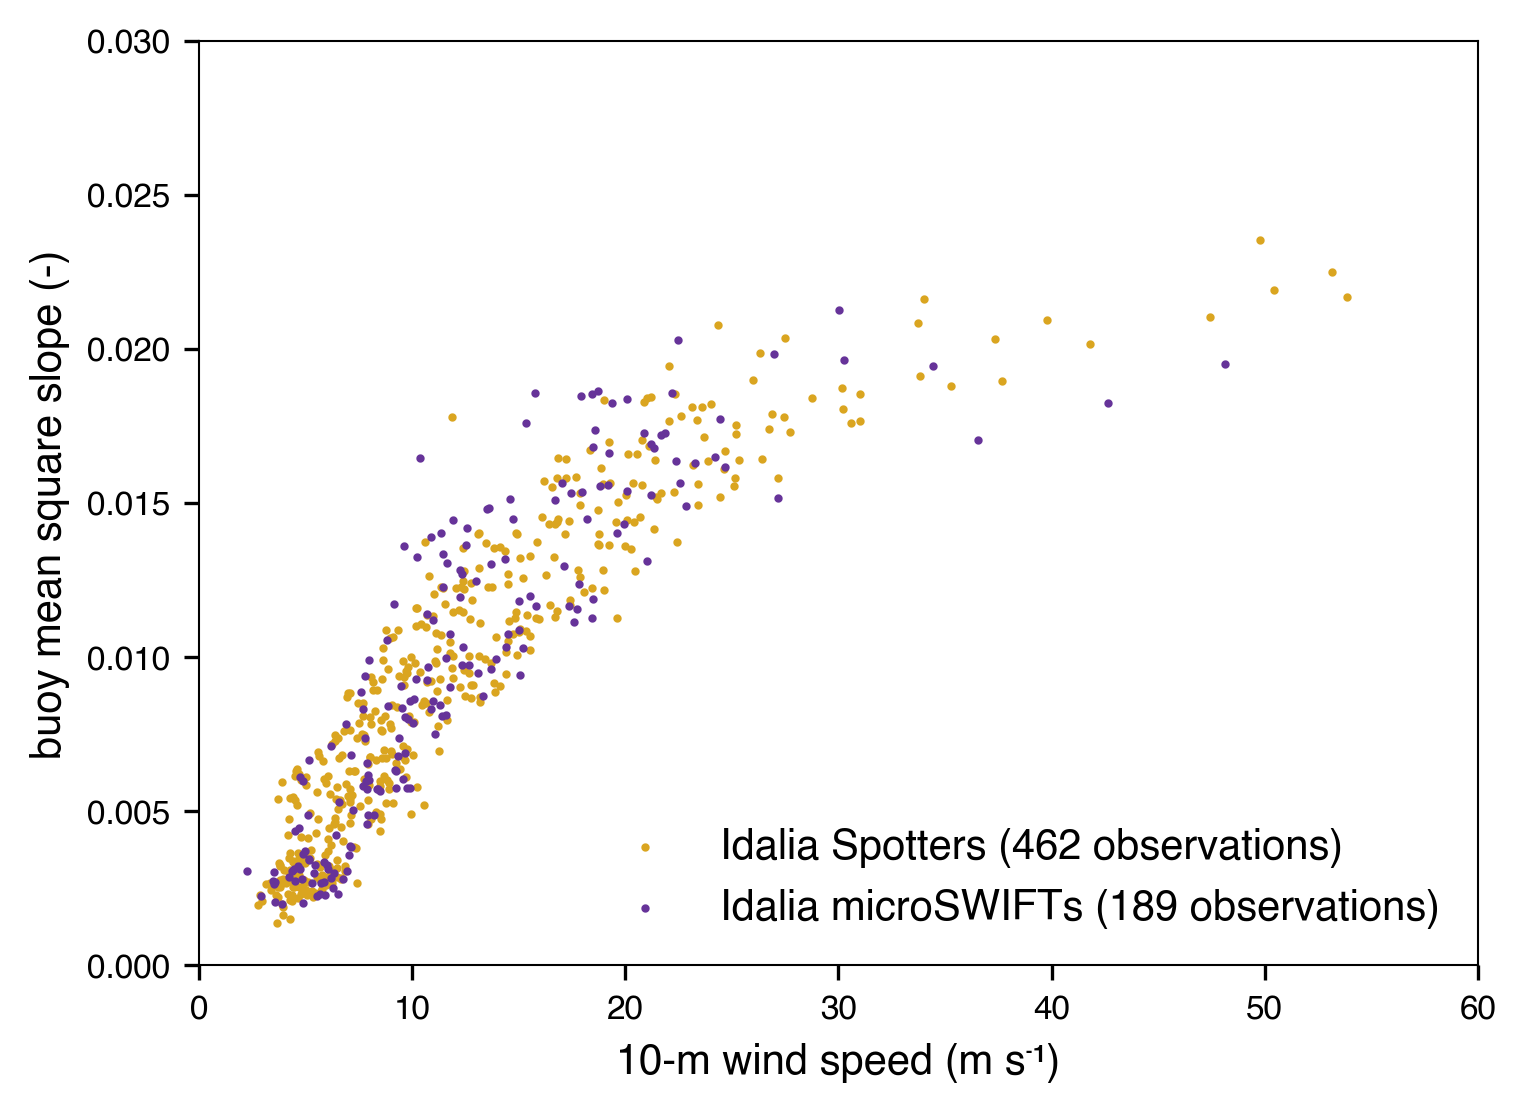

In [248]:
FIGURE_TITLE = "mean_square_slope_versus_wind_speed_by_drifter"
FIGURE_SIZE = (plotting.figure_full_width, 4)
FIGURE_MARKER_SIZE = 1

fig,ax = plt.subplots(figsize=FIGURE_SIZE)

ax.scatter(
    x=spotter_df['wind_speed'],
    y=spotter_df['mean_square_slope_intrinsic'],
    label=f'Idalia Spotters ({spotter_df["wind_speed"].notna().sum()} observations)',
    color=plotting.get_drifter_color('spotter'),
    edgecolor=plotting.get_drifter_color('spotter'),
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

ax.scatter(
    x=microswift_df['wind_speed'],
    y=microswift_df['mean_square_slope_intrinsic'],
    label=f'Idalia microSWIFTs ({microswift_df["wind_speed"].notna().sum()} observations)',
    color=plotting.get_drifter_color('microswift'),
    edgecolor=plotting.get_drifter_color('microswift'),
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

ax.set_xlim(0, 60)
ax.set_ylim(0,0.03)
ax.set_xlabel('10-m wind speed (m s\u207B\u00B9)')
ax.set_ylabel('buoy mean square slope (-)')
ax.legend(loc='lower right', frameon=False, fontsize=10)

# fig.savefig(f"{FIGURE_TITLE}.{IMAGE_FILE_TYPE}", dpi=IMAGE_RESOLUTION, format=IMAGE_FILE_TYPE)

Plot Hurricane Idalia (2023), Hurricane Fiona (2022), and Hurricane Ian (2022) mean square slope versus COAMPS-TC wind speed (from Davis et al., 2023)

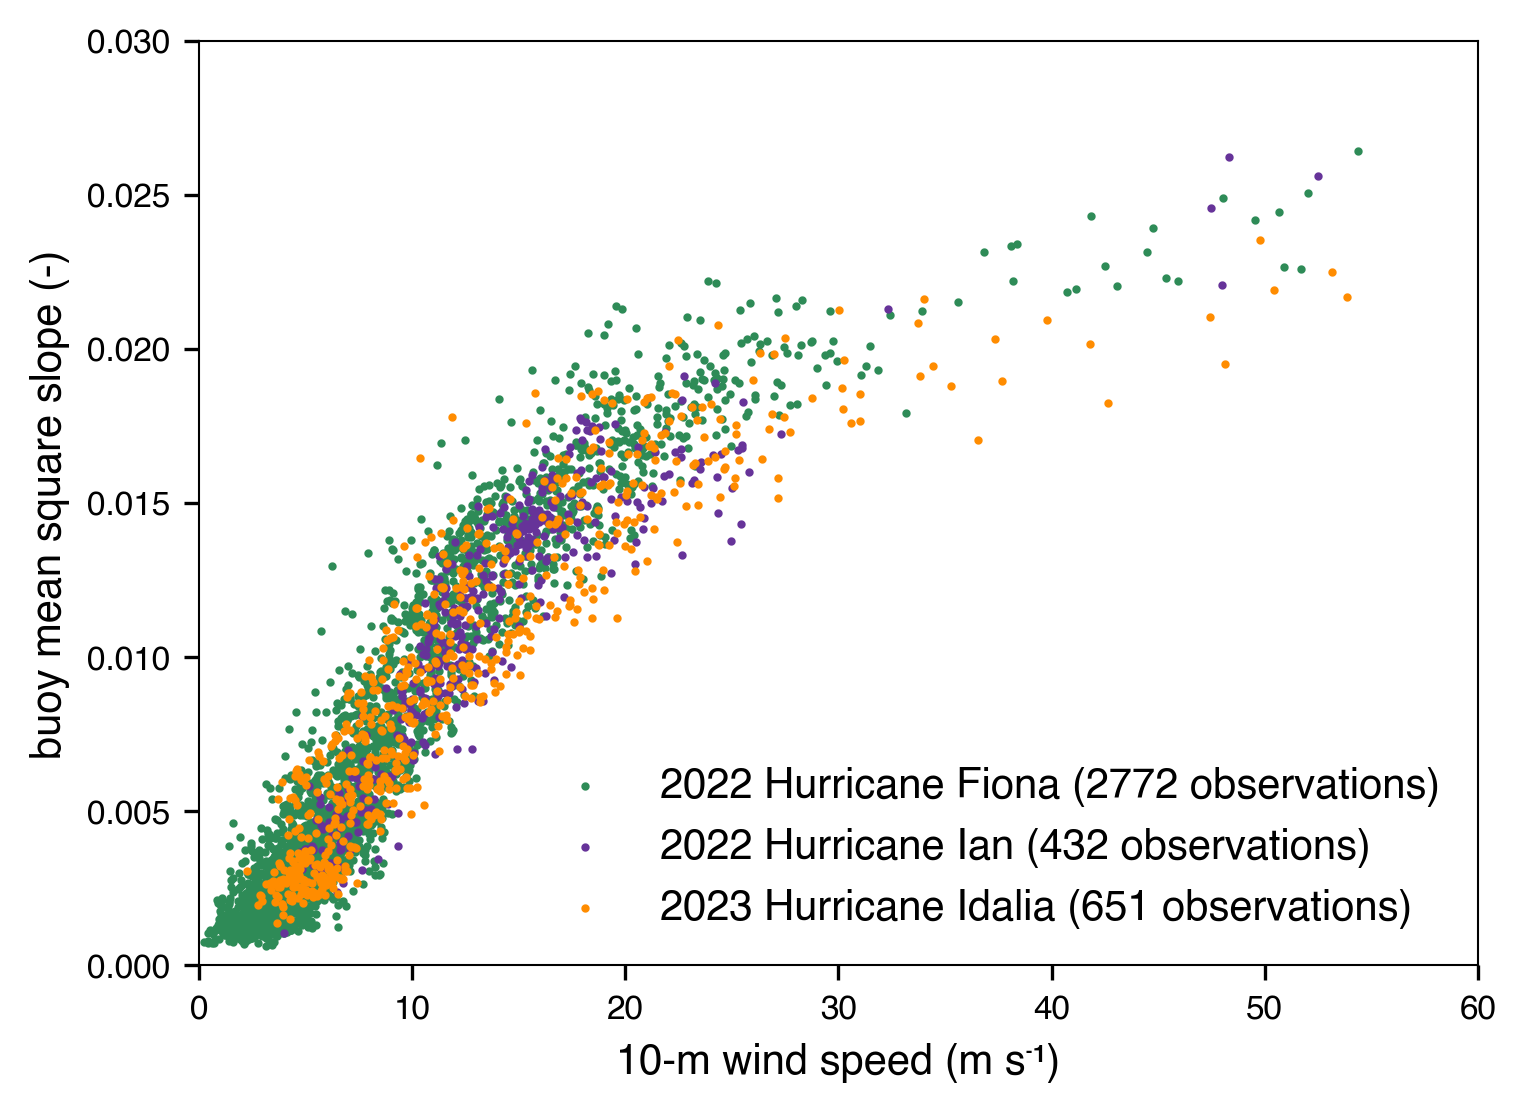

In [249]:
FIGURE_TITLE = "mean_square_slope_versus_wind_speed_with_davis_et_al_2023"
FIGURE_SIZE = (plotting.figure_full_width, 4)
FIGURE_MARKER_SIZE = 1

fig,ax = plt.subplots(figsize=FIGURE_SIZE)

ax.scatter(
    x=fiona_spotter_coamps_df['wind_speed'],
    y=fiona_spotter_coamps_df['mean_square_slope_intrinsic_deep_limit'],
    label=f'2022 Hurricane Fiona ({fiona_spotter_coamps_df["wind_speed"].notna().sum()} observations)',
    color='seagreen',
    edgecolor='seagreen',
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

ax.scatter(
    x=ian_spotter_coamps_df['wind_speed'],
    y=ian_spotter_coamps_df['mean_square_slope_intrinsic_deep_limit'],
    label=f'2022 Hurricane Ian ({ian_spotter_coamps_df["wind_speed"].notna().sum()} observations)',
    color='rebeccapurple',
    edgecolor='rebeccapurple',
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

ax.scatter(
    x=spotter_df['wind_speed'],
    y=spotter_df['mean_square_slope_intrinsic'],
    label=f'2023 Hurricane Idalia ({spotter_df["wind_speed"].notna().sum() + microswift_df["wind_speed"].notna().sum()} observations)',
    color='darkorange',
    edgecolor='darkorange',
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

ax.scatter(
    x=microswift_df['wind_speed'],
    y=microswift_df['mean_square_slope_intrinsic'],
    color='darkorange',
    edgecolor='darkorange',
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

ax.set_xlim(0, 60)
ax.set_ylim(0,0.03)
ax.set_xlabel('10-m wind speed (m s\u207B\u00B9)')
ax.set_ylabel('buoy mean square slope (-)')
ax.legend(loc='lower right', frameon=False, fontsize=10)

# fig.savefig(f"{FIGURE_TITLE}.{IMAGE_FILE_TYPE}", dpi=IMAGE_RESOLUTION, format=IMAGE_FILE_TYPE)

Compare observed and intrinsic mean square slopes versus wind speed.

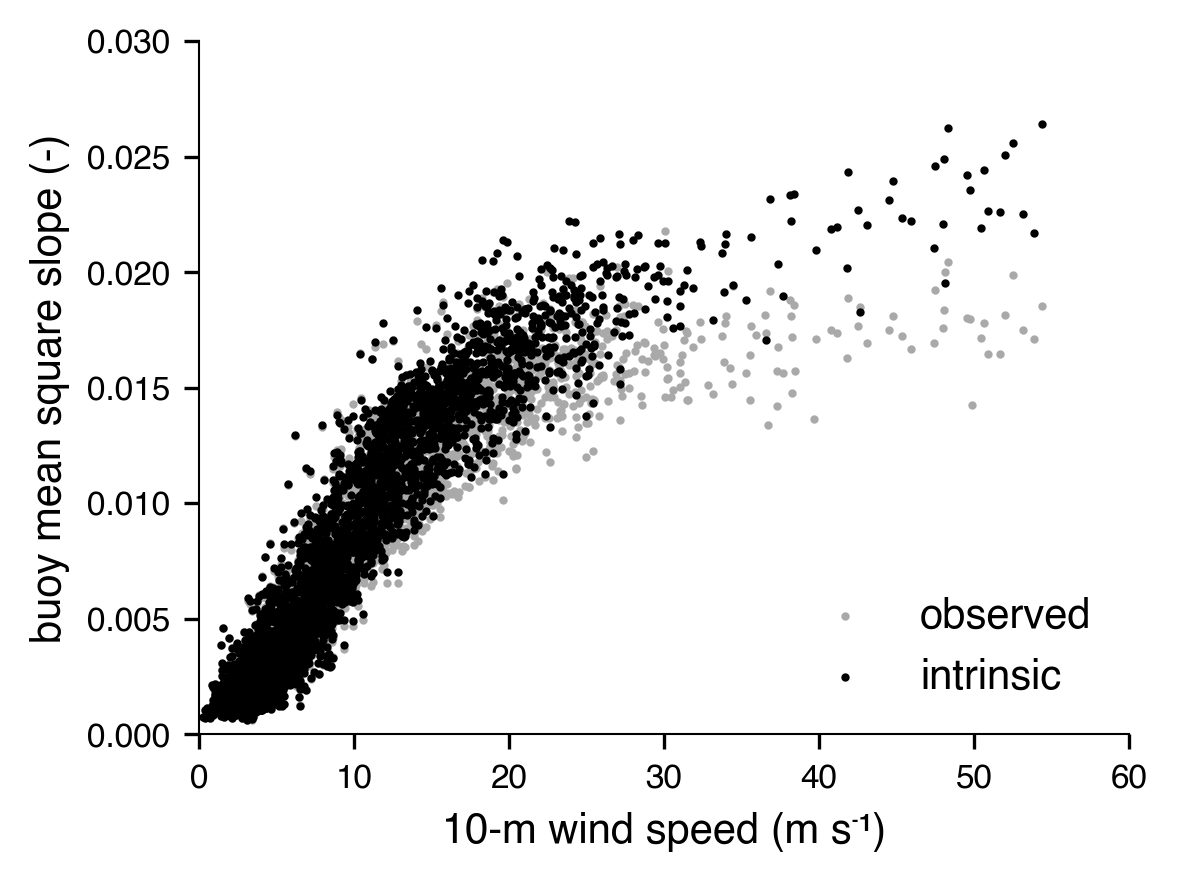

In [250]:
FIGURE_TITLE = "afig-mean_square_slope_versus_wind_speed_observed_and_intrinsic"
FIGURE_SIZE = (4, 3)
FIGURE_MARKER_SIZE = 1
MARKER_COLOR_INTRINSIC = 'black'
MARKER_COLOR_OBSERVED = 'darkgray'

fig,ax = plt.subplots(figsize=FIGURE_SIZE)

# observed
ax.scatter(
    x=fiona_spotter_coamps_df['wind_speed'],
    y=fiona_spotter_coamps_df['mean_square_slope_observed'],
    label=f'observed',
    color=MARKER_COLOR_OBSERVED,
    edgecolor=MARKER_COLOR_OBSERVED,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)
ax.scatter(
    x=ian_spotter_coamps_df['wind_speed'],
    y=ian_spotter_coamps_df['mean_square_slope_observed'],
    color=MARKER_COLOR_OBSERVED,
    edgecolor=MARKER_COLOR_OBSERVED,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)
ax.scatter(
    x=spotter_df['wind_speed'],
    y=spotter_df['mean_square_slope_observed'],
    color=MARKER_COLOR_OBSERVED,
    edgecolor=MARKER_COLOR_OBSERVED,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)
ax.scatter(
    x=microswift_df['wind_speed'],
    y=microswift_df['mean_square_slope_observed'],
    color=MARKER_COLOR_OBSERVED,
    edgecolor=MARKER_COLOR_OBSERVED,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

# intrinsic
ax.scatter(
    x=fiona_spotter_coamps_df['wind_speed'],
    y=fiona_spotter_coamps_df['mean_square_slope_intrinsic_deep_limit'],
    label=f'intrinsic',
    color=MARKER_COLOR_INTRINSIC,
    edgecolor=MARKER_COLOR_INTRINSIC,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)
ax.scatter(
    x=ian_spotter_coamps_df['wind_speed'],
    y=ian_spotter_coamps_df['mean_square_slope_intrinsic_deep_limit'],
    color=MARKER_COLOR_INTRINSIC,
    edgecolor=MARKER_COLOR_INTRINSIC,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)
ax.scatter(
    x=spotter_df['wind_speed'],
    y=spotter_df['mean_square_slope_intrinsic'],
    color=MARKER_COLOR_INTRINSIC,
    edgecolor=MARKER_COLOR_INTRINSIC,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)
ax.scatter(
    x=microswift_df['wind_speed'],
    y=microswift_df['mean_square_slope_intrinsic'],
    color=MARKER_COLOR_INTRINSIC,
    edgecolor=MARKER_COLOR_INTRINSIC,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)
plotting.remove_top_and_right_spines(ax)


ax.set_xlim(0, 60)
ax.set_ylim(0,0.03)
ax.set_xlabel('10-m wind speed (m s\u207B\u00B9)')
ax.set_ylabel('buoy mean square slope (-)')
ax.legend(loc='lower right', frameon=False, fontsize=10)

fig.savefig(f"{FIGURE_TITLE}.png", bbox_inches='tight')

**Appendix Figure:** Observed and intrinsic mean square slope (0.05 Hz to 0.5 Hz) versus wind speed.  The data include observations from Hurricane Idalia (this study) and Hurricanes Ian and Fiona (Davis et al., 2023).

## Fitting

Combine mean square slope and wind speed data from each buoy in to a single DataFrame, `fit_df`.

In [251]:
spotter_fit_data = (spotter_df[['wind_speed', 'mean_square_slope_intrinsic']]
                    .dropna()
                    .sort_values(by='wind_speed', axis=0))

microswift_fit_data = (microswift_df[['wind_speed', 'mean_square_slope_intrinsic']]
                       .dropna()
                       .sort_values(by='wind_speed', axis=0))

fit_df = pd.concat((spotter_fit_data, microswift_fit_data))
fit_df.sort_values(by='wind_speed', axis=0, inplace=True)

Fit a $a\tanh(b U_{10}) + U_{10} c + d$ function to the mean square slope versus wind speed data.  The linear term, $c U_{10}$, is an augmentation to the originally proposed tanh fit to the Ian and Fiona data, which were not adjusted for the surface drift Doppler shift (Davis et al., 2023).  This term is necessary to capture the trend at high winds where the spectrum is dominated by the saturation range (such that the increase in slope with wind speed is drastically reduced, but is nonzero).

In [252]:
def mss_tanh_fit(u, a, b, c, d):
     return a*np.tanh(b*u) + c*u + d

Fit the function using nonlinear least squares.  Here `popt` are the optimal parameters ($a$, $b$, $c$, and $d$) and `pcov` is the estimated approximate covariance of the parameters.

In [253]:
tanh_fit = {
     'fun': mss_tanh_fit,
}

# fit the model
tanh_fit['popt'], tanh_fit['pcov'] = curve_fit(
   tanh_fit['fun'],
   xdata=fit_df['wind_speed'],
   ydata=fit_df['mean_square_slope_intrinsic'],
)

# Approximate parameter confidence intervals using the covariance matrix.
tanh_fit['perr'], tanh_fit['t_value'], tanh_fit['popt_upper'], tanh_fit['popt_lower'] \
   = stats.parameter_confidence_intervals(
    popt=tanh_fit['popt'],
    pcov=tanh_fit['pcov'],
    n=len(fit_df['mean_square_slope_intrinsic']),
    alpha=0.05,  # 95% confidence interval
)

# Calculate the RMSE.
fit_df['tanh_fit'] = tanh_fit['fun'](fit_df['wind_speed'], *tanh_fit['popt'])
tanh_fit['rmse'] = stats.root_mean_square_error(
   y=fit_df['mean_square_slope_intrinsic'],
   y_hat=fit_df['tanh_fit']
)

# Calculate residuals.
fit_df['tanh_fit_residuals'] = fit_df['mean_square_slope_intrinsic'] - fit_df['tanh_fit']

Print the coefficients.

In [254]:
# Parameters +/- 95% confidence intervals.
stats.print_fit_parameters(tanh_fit, parameter_names=['a', 'b', 'c', 'd'], print_format='0.6f')

# Root mean square error.
print(f'RMSE: {tanh_fit["rmse"]:.5f}')

# Upper and lower wind speeds.
print(f'Valid U_{10} range: {fit_df['wind_speed'].min():0.0f} m/s '
      f'to {fit_df['wind_speed'].max():0.0f} m/s')


a: 0.020362 +/- 0.004137
b: 0.054152 +/- 0.010191
c: 0.000062 +/- 0.000105
d: -0.001987 +/- 0.000674
RMSE: 0.00179
Valid U_10 range: 2 m/s to 54 m/s


Here, uncertainties represent 95\% confidence intervals on the parameters derived from the covariance matrix estimated during the nonlinear least squares fitting.  These coefficients are valid for $U_{10} \in [2, 52]$ m/s and for an mss integrated over frequencies from 0.05 Hz to 0.5 Hz (624 m to 6.2 m wavelength).

Plot the fit on top of the original data and plot the residuals.

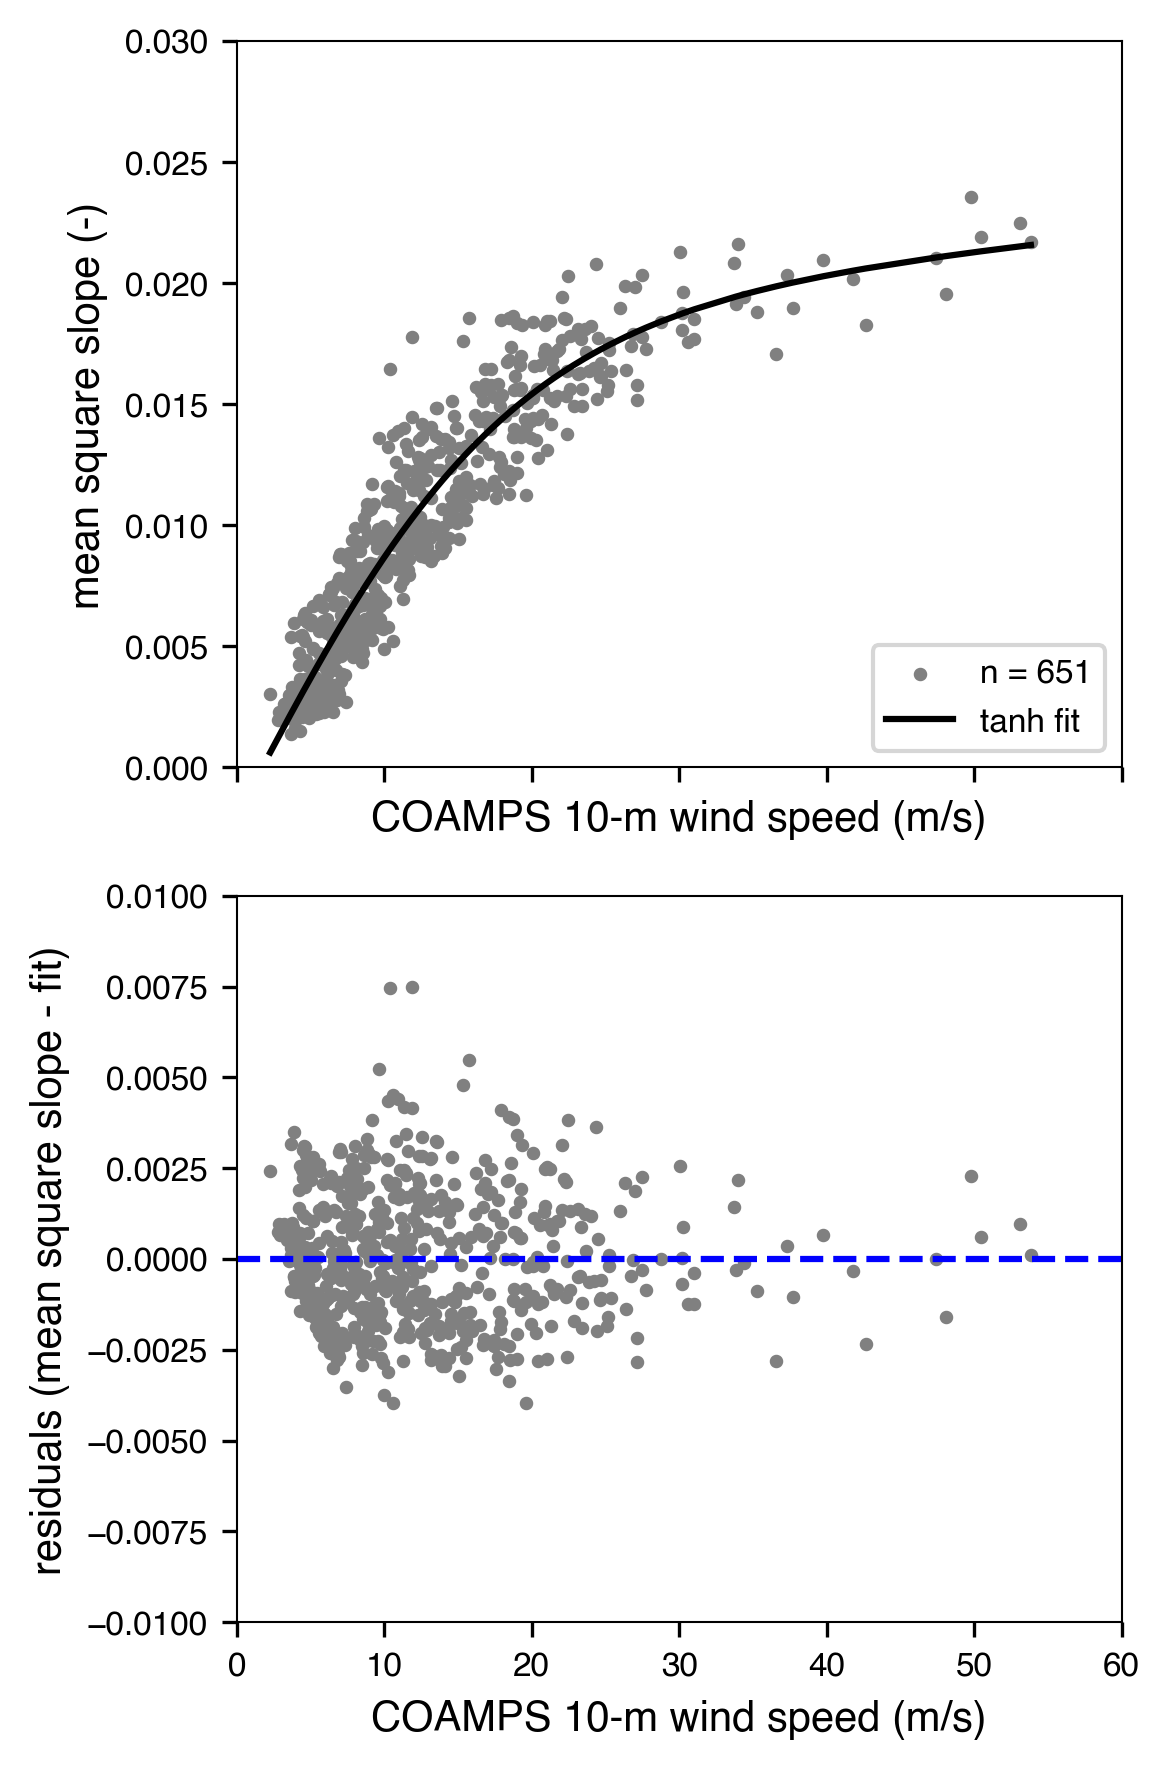

In [255]:
fig, ax = plt.subplots(2, 1, figsize=(4, 6), sharex=True)

# fit plot
ax[0].scatter(
    fit_df['wind_speed'],
    fit_df['mean_square_slope_intrinsic'],
    s=5,
    color='grey',
    label=f'n = {fit_df["mean_square_slope_intrinsic"].size}'
)
ax[0].plot(
    fit_df['wind_speed'],
    fit_df['tanh_fit'],
    color='k',
    label='tanh fit'
)
ax[0].set_xlabel('COAMPS 10-m wind speed (m/s)')
ax[0].set_ylabel('mean square slope (-)')
ax[0].legend(frameon=True, loc='lower right')
ax[0].set_ylim([0, 0.03])

# residual plot
ax[1].scatter(
    fit_df['wind_speed'],
    fit_df['tanh_fit_residuals'],
    s=5,
    color='grey',
)
ax[1].set_xlabel('COAMPS 10-m wind speed (m/s)')
ax[1].set_ylabel('residuals (mean square slope - fit)')
ax[1].axhline(0, color='b', linestyle='--')
ax[1].set_ylim(0.01 * np.array([-1, 1]))
ax[1].set_xlim([0, 60])

fig.tight_layout()
# fig.savefig('idalia_mss_fit_and_residuals_spotter_only.png', dpi=400)

Calculate the residuals (observations minus fit) for each buoy observation and add it to the DataFrame.

In [256]:
spotter_df['mean_square_slope_intrinsic_residual'] = stats.calculate_residuals(
    spotter_df['mean_square_slope_intrinsic'],
    spotter_df['wind_speed'],
    tanh_fit['fun'],
     *tanh_fit['popt'],
)

microswift_df['mean_square_slope_intrinsic_residual'] = stats.calculate_residuals(
    microswift_df['mean_square_slope_intrinsic'],
    microswift_df['wind_speed'],
    tanh_fit['fun'],
    *tanh_fit['popt'],
)

## COAMPS-TC wind speed validation

Compare COAMPS-TC surface wind speeds with SFMR surface wind speeds collected during NOAA and Air Force flights.  The difference between SFMR and COAMPS-TC will be used to quantify error as a function of wind speed.

Plot flight tracks with SFMR surface wind speed estimates.

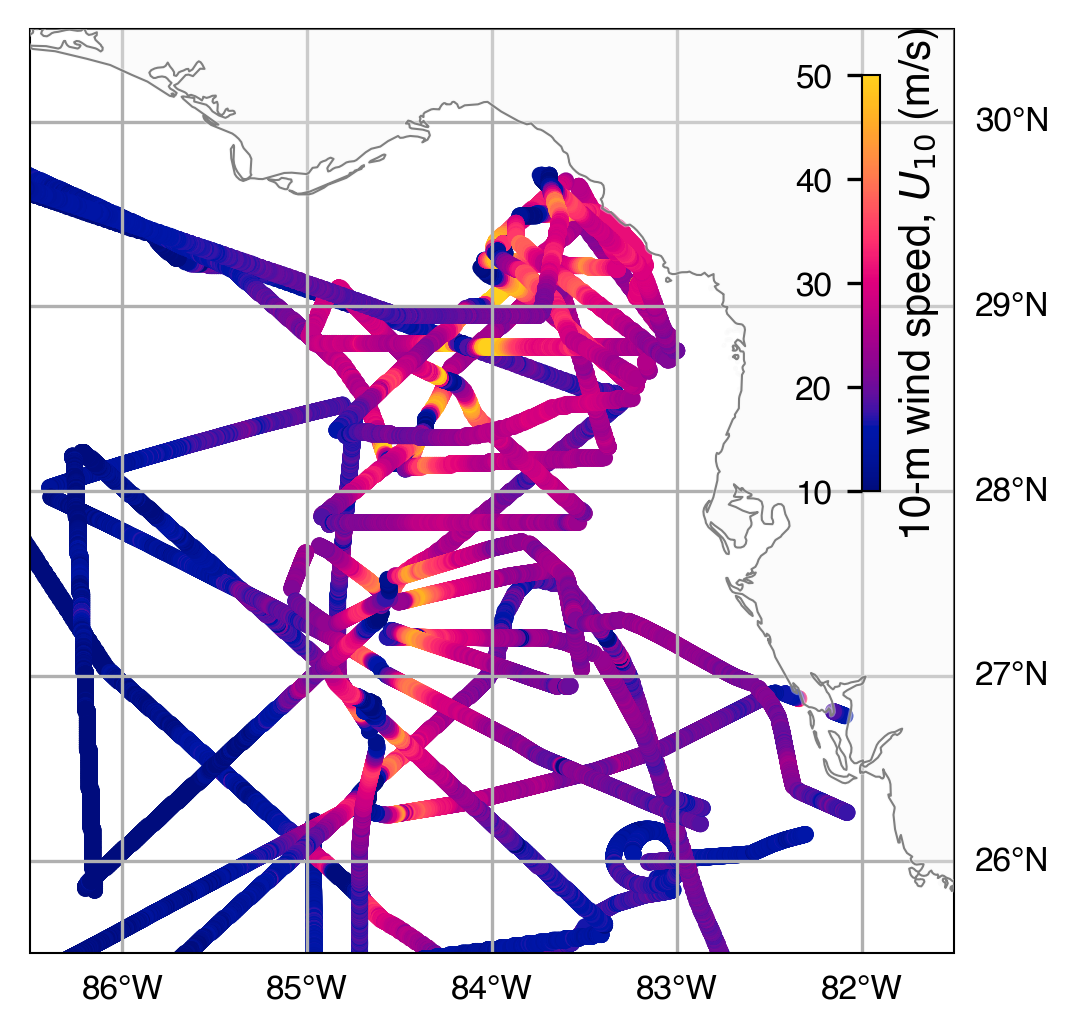

In [264]:
CRS = cartopy.crs.PlateCarree()
FIG_SIZE = (4.5, 4)
EXTENT = [-86.5, -81.5, 25.5, 30.5]

fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)

# Plot the base Cartopy map
plotting.plot_base_chart(
    ax,
    extent=EXTENT,
)

sfmr_plot_kwargs = dict(
    s=5,
)

sfmr_plot = ax.scatter(
    sfmr_ds['longitude'],
    sfmr_ds['latitude'],
    c=sfmr_ds['sfmr_10m_wind_speed'],
    **plotting.wind_speed_plot_kwargs,
)

cax = ax.inset_axes([0.9, 0.5, 0.02, 0.45], axes_class=mpl.axes.Axes)
cbar = plt.colorbar(sfmr_plot, cax=cax)
cax.yaxis.set_ticks_position('left')
cbar.set_label('10-m wind speed, $U_{10}$ (m/s)')
# fig.savefig('revfig-sfmr_flight_tracks.png', dpi=400, bbox_inches='tight')


Plot an example time series.

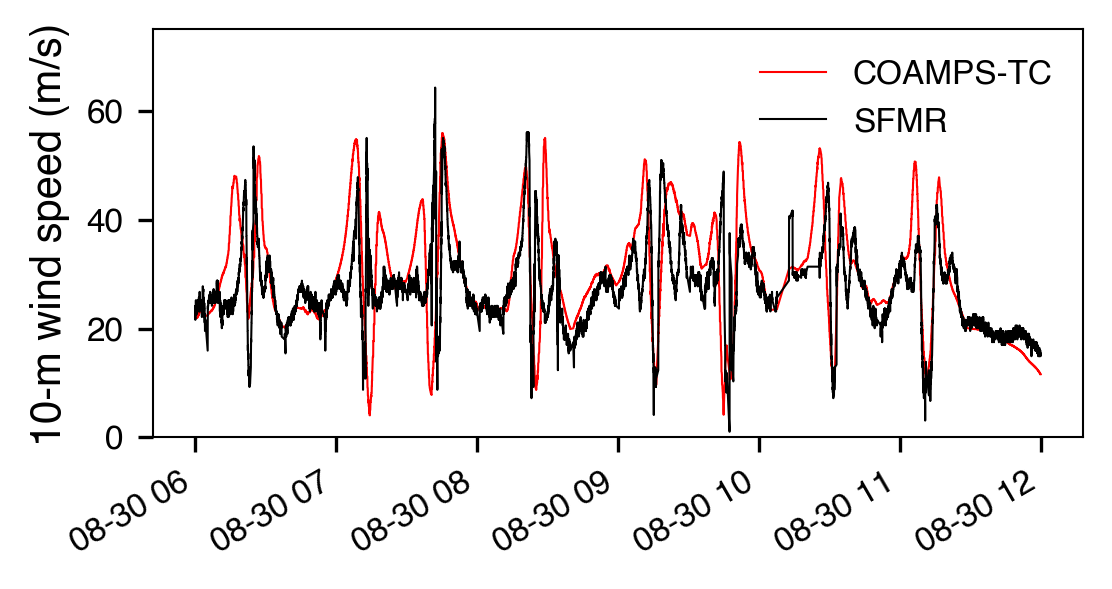

In [267]:
start_date = pd.Timestamp('2023-08-30T06:00', tz=None)
end_date = pd.Timestamp('2023-08-30T12:00', tz=None)

time_slice = slice(start_date, end_date)

fig, ax = plt.subplots(1, 1, figsize=(4, 2))
ax.plot(
    sfmr_ds.sel(datetime=time_slice)['datetime'],
    sfmr_ds.sel(datetime=time_slice)['coamps_10m_wind_speed'],
    linewidth=0.5,
    color='r',
    label='COAMPS-TC',
)
ax.plot(
    sfmr_ds.sel(datetime=time_slice)['datetime'],
    sfmr_ds.sel(datetime=time_slice)['sfmr_10m_wind_speed'],
    linewidth=0.5,
    color='k',
    label='SFMR',
)
ax.set_ylabel('10-m wind speed (m/s)')
ax.legend(frameon=False)
ax.set_ylim([0, 75])
fig.autofmt_xdate()


Filter the SFMR and COAMPS-TC surface wind speeds used in the validation.  Wind speeds > 10 m/s will be used (SFMR is not reliable at low wind speeds).

In [258]:
# SFMR is accurate accurate above moderate wind speeds.
min_wind_speed = 10  # m/s
above_min_wind_speed = np.logical_and(sfmr_ds['coamps_10m_wind_speed'] > min_wind_speed, sfmr_ds['sfmr_10m_wind_speed'] > min_wind_speed)

# Drop NaNs
not_nan = np.logical_and(~sfmr_ds['coamps_10m_wind_speed'].isnull(), ~sfmr_ds['sfmr_10m_wind_speed'].isnull())
is_valid = not_nan & above_min_wind_speed
coamps_sfmr_wind = sfmr_ds['coamps_10m_wind_speed'].where(is_valid, drop=True)
sfmr_wind = sfmr_ds['sfmr_10m_wind_speed'].where(is_valid, drop=True)

Plot an error histogram.

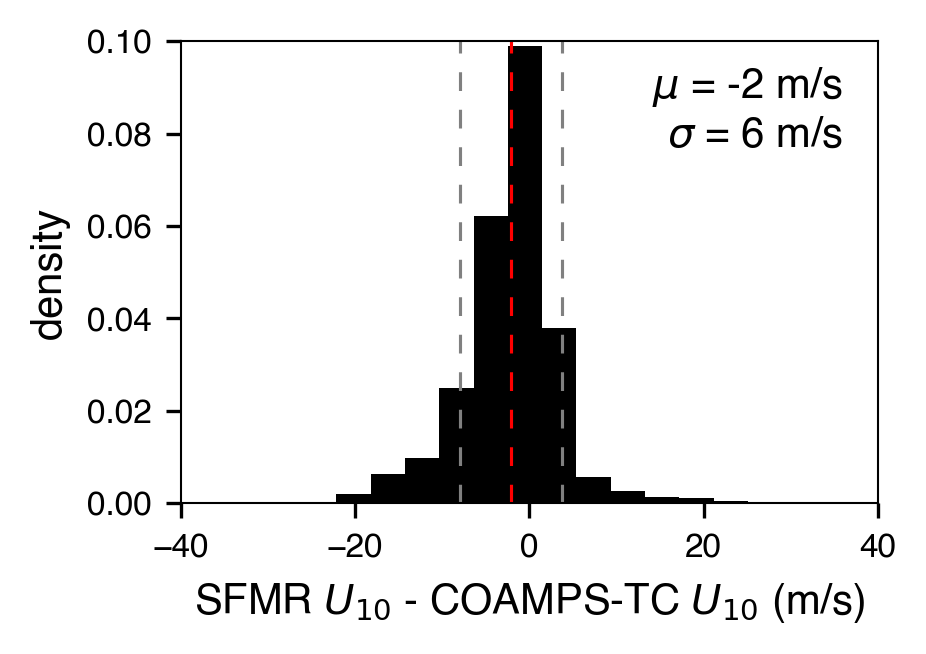

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
error = sfmr_wind - coamps_sfmr_wind

ax.hist(error, color='k', density=True, bins=20)
ax.set_xlabel('SFMR $U_{10}$ - COAMPS-TC $U_{10}$ (m/s)')
ax.set_ylabel('density')
ax.set_xlim(40 * np.array([-1, 1]))
ax.set_ylim(0, 0.1)
stat_line_kwargs = {
    'linestyle': '--',
    'linewidth': 0.75,
    'dashes': (6, 6),
}
ax.axvline(error.mean(), color='r', **stat_line_kwargs)
ax.axvline(error.mean() + error.std(), color='grey', **stat_line_kwargs)
ax.axvline(error.mean() - error.std(), color='grey', **stat_line_kwargs)
ax.annotate(r'$\mu$' + f' = {error.mean():0.0f} m/s\n'
            r'$\sigma$' + f' = {error.std():0.0f} m/s',
             (0.95, 0.95), xycoords='axes fraction', ha='right', va='top')
# fig.savefig('revfig-coamps_error_histogram.png', dpi=400, bbox_inches='tight')


Esimate the bias and error in 10 m/s wind speed bins.

In [260]:
WIND_SPEED_BIN_SIZE = 10
MINIMUM_BIN_EDGE = 15
MAXIMUM_BIN_EDGE = 55

wind_speed_bins = np.arange(MINIMUM_BIN_EDGE, MAXIMUM_BIN_EDGE+WIND_SPEED_BIN_SIZE, WIND_SPEED_BIN_SIZE)
wind_speed_bin_centers = wind_speed_bins[:-1] + np.diff(wind_speed_bins)/2

wind_speed_bin_error_mean = error.groupby_bins(group=sfmr_wind, bins=wind_speed_bins).apply(np.mean)
wind_speed_bin_error_std = error.groupby_bins(group=sfmr_wind, bins=wind_speed_bins).apply(np.std)

error_std_percentage_in_bin = wind_speed_bin_error_std / wind_speed_bin_centers * 100

print(f'wind speed bin edges: {wind_speed_bins} m/s')
print(f'wind speed bin centers: {wind_speed_bin_centers.round(0)} m/s')
print(f'error mean in bin: {wind_speed_bin_error_mean.values.round(0)} m/s')
print(f'error stdev in bin: {wind_speed_bin_error_std.values.round(0)} m/s')
print(f'error stdev % of wind speed in bin: {error_std_percentage_in_bin.values.round(0)} %')

wind speed bin edges: [15 25 35 45 55] m/s
wind speed bin centers: [20. 30. 40. 50.] m/s
error mean in bin: [-2. -3.  0. 10.] m/s
error stdev in bin: [ 5.  7. 10. 12.] m/s
error stdev % of wind speed in bin: [24. 23. 24. 25.] %


Plot SMFR surface wind speed versus COAMPS-TC surface wind speed as a 2D histogram and scatter plot.

Text(0, 0.5, 'SFMR $U_{10}$ (m/s)')

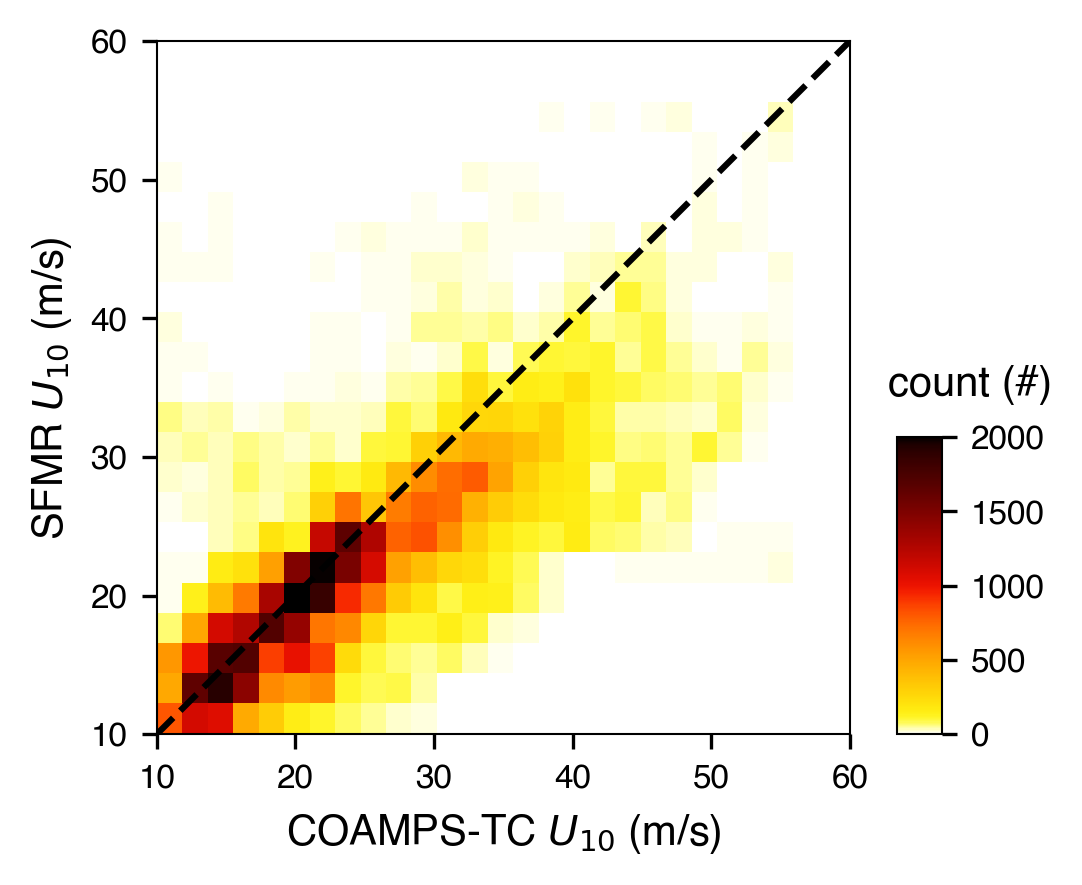

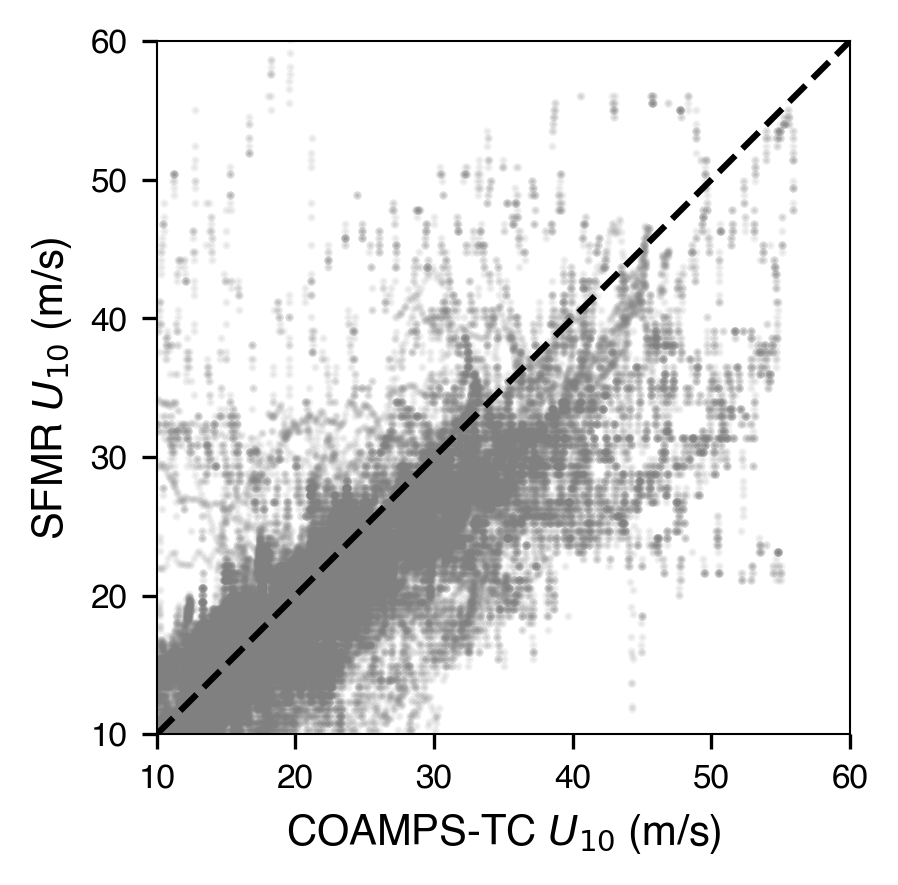

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
cmap = colorcet.cm.fire_r
norm = mpl.colors.Normalize(vmin=0, vmax=2000)

hist_plot = ax.hist2d(
    coamps_sfmr_wind,
    sfmr_wind,
    bins=(25, 25),
    cmap=cmap,
    norm=norm,
)
axes_limits = [10, 60]
ax.set_ylim(axes_limits)
ax.set_xlim(axes_limits)
ax.plot(axes_limits, axes_limits, color='k', linestyle='--')
ax.set_aspect('equal')
ax.set_xlabel('COAMPS-TC $U_{10}$ (m/s)')
ax.set_ylabel('SFMR $U_{10}$ (m/s)')
cax = fig.add_axes([0.95, 0.11, 0.05, 0.33])  # [left, bottom, width, height]
cbar = fig.colorbar(hist_plot[3], ax=ax, cax=cax)
cax.set_title('count (#)', ha='left', x=-0.2, pad=10)
# fig.savefig('revfig-sfmr_and_coamps_wind_speed_comparison.png', dpi=400, bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.scatter(
    coamps_sfmr_wind,
    sfmr_wind,
    color='grey',
    s=1,
    alpha=0.1,
)
axes_limits = [10, 60]
ax.set_ylim(axes_limits)
ax.set_xlim(axes_limits)
ax.plot(axes_limits, axes_limits, color='k', linestyle='--')
ax.set_aspect('equal')
ax.set_xlabel('COAMPS-TC $U_{10}$ (m/s)')
ax.set_ylabel('SFMR $U_{10}$ (m/s)')


In [270]:
error

<xarray.DataArray (datetime: 74770)>
array([-0.17545594, -0.07359264,  0.36573664, ...,  4.91274982,
        4.91321934,  4.91368876])
Coordinates:
  * datetime  (datetime) datetime64[ns] 2023-08-29T10:48:58 ... 2023-08-30T12...

(-300000.0, 300000.0)

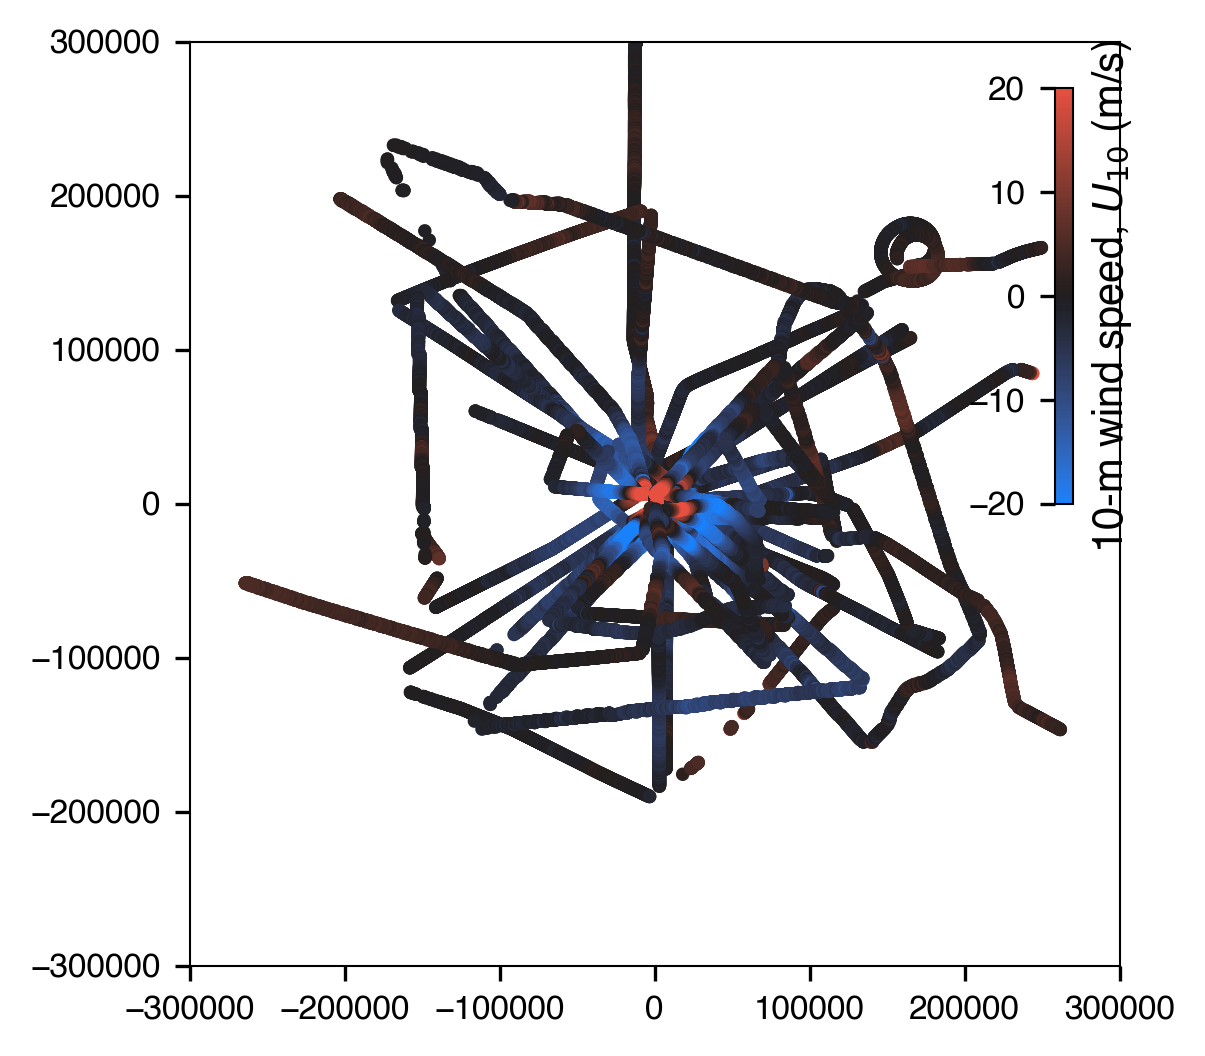

In [283]:
FIG_SIZE = (4, 4)

norm = mpl.colors.Normalize(vmin=-20, vmax=20)
cmap = colorcet.cm.bkr

fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)

sfmr_plot = ax.scatter(
    sfmr_ds.where(is_valid, drop=True)['storm_distance_east'] * 10**(3),
    sfmr_ds.where(is_valid, drop=True)['storm_distance_north'] * 10**(3),
    c=error,
    norm=norm,
    cmap=cmap,
    s=5,
)


cax = ax.inset_axes([0.93, 0.5, 0.02, 0.45], axes_class=mpl.axes.Axes)
cbar = plt.colorbar(sfmr_plot, cax=cax)
cax.yaxis.set_ticks_position('left')
cbar.set_label('10-m wind speed, $U_{10}$ (m/s)')

ax.set_xlim(300 * 10**3 * np.array([-1, 1]))
ax.set_ylim(300 * 10**3 * np.array([-1, 1]))

## Store

In [263]:
%%capture
%store microswift_df
%store spotter_df
%store fit_df
%store tanh_fit

## References

Davis, J. R., Thomson, J., Houghton, I. A., Doyle, J. D., Komaromi, W. A., Fairall, C. W., Thompson, E. J., & Moskaitis, J. R. (2023). Saturation of Ocean Surface Wave Slopes Observed During Hurricanes. Geophysical Research Letters, 50(16), e2023GL104139. https://doi.org/10.1029/2023GL104139
